## EV Comparative Analysis 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#model's
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [7]:
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

### Checking all the unique values here : 

In [8]:
df.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

### "We are only glancing at the EV price below then 1,00,000"

In [9]:
filter = df[df['PriceEuro'] < 100000 ]
filter

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


### Brands with the Range of EVs car :

<Figure size 1500x800 with 0 Axes>

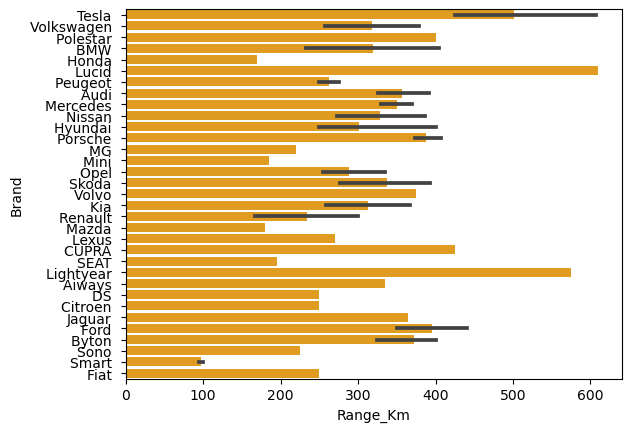

<Figure size 1500x800 with 0 Axes>

In [10]:
sns.barplot(x = df["Range_Km"] , y = df["Brand"] , color = 'orange')   
plt.figure(figsize = (15,8))

### Analysis for the Power Train 
   #### segementation of power train by its usage in different brands 

<Axes: >

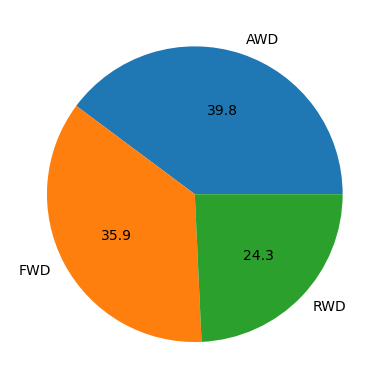

In [11]:
df.groupby('PowerTrain').size().plot(kind ='pie', autopct = '%.1f')

#### On Average basis which power train is best to use in EV's:

In [12]:
print("Avg range in Km value when Power Train used as AWD: ", round(filter[filter["PowerTrain"] == "AWD"]["Range_Km"].mean(),2))
print("Avg range in Km value when Power Train used as RWD: ", round(filter[filter["PowerTrain"] == "RWD"]["Range_Km"].mean(),2))
print("Avg range in Km value when Power Train used as FWD: ", round(filter[filter["PowerTrain"] == "FWD"]["Range_Km"].mean(),2))

Avg range in Km value when Power Train used as AWD:  404.03
Avg range in Km value when Power Train used as RWD:  299.4
Avg range in Km value when Power Train used as FWD:  268.24


#### Analysis
We can see here, AWD is far ahead as comaprisrion to the RWD & FWD Power Train  

### Segementation of EVs w.r.t Body Style 

<Axes: >

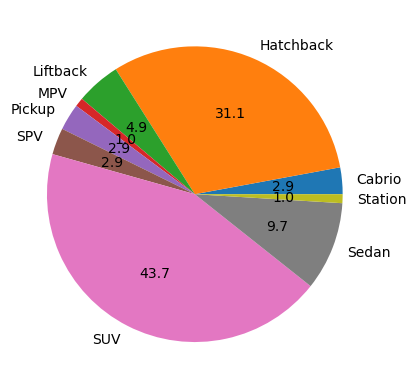

In [13]:
df.groupby('BodyStyle').size().plot(kind ='pie', autopct = '%.1f')

#### Analysis
As per the data analysis we can infer, most of the EVS body style is coming in SUV & Hatchback styles.Moving towrds the future for having EVs, we can also delve our self for manufacturing sedan evs because of its popularity between the car lovers.    

### Most used Pluge Type in EV's

<Axes: >

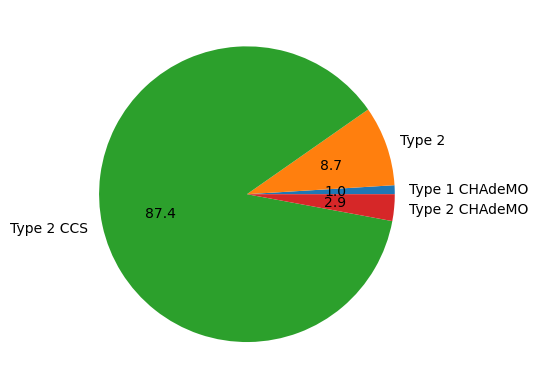

In [14]:
df.groupby('PlugType').size().plot(kind ='pie', autopct = '%.1f')

#### Analysis
"Type 2 CCS" chrager mostly used in EVs as per the knowleadge of the given data set with 87.4%. Also,it’s been observed by growing its popularity — particularly in Europe.It’s used by most manufacturers , and it adds two additional DC power lines to a Type 2 plug, to boost the voltage.


After "Type 2 CCS", we can glance at "Type 2" with 8.7% usage.

### Analysis For Rapid Chargers 

<Axes: >

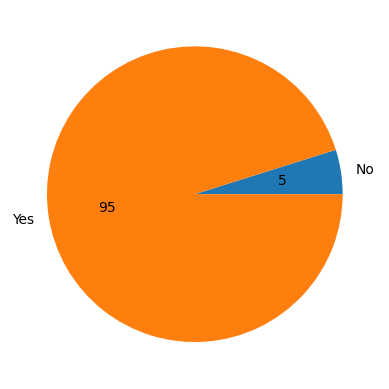

In [18]:
df.groupby('RapidCharge').size().plot(kind ='pie', autopct = '%.0f')

### Analysis:
Most of the companies are utilizingn the rapid chargeers.Below are five brands which are using the rapid chargers

#### Brand's without RapidCharger

In [19]:
df[df['RapidCharge'] == "No"]["Brand"]

57    Renault 
68    Renault 
77      Smart 
82      Smart 
91      Smart 
Name: Brand, dtype: object

### Seeking the top 50 EVs as per the range Km:

In [20]:
df_sorted = df.sort_values(by = "Range_Km" , ascending = False)
top_50_evs = df_sorted.head(50)
top_50_evs

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000
33,Tesla,Cybertruck Tri Motor,3.0,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
48,Lightyear,One,10.0,150,575,104,540,Yes,AWD,Type 2 CCS,Liftback,F,5,149000
40,Tesla,Model S Long Range,3.8,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
59,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
67,Tesla,Cybertruck Dual Motor,5.0,190,460,261,710,Yes,AWD,Type 2 CCS,Pickup,N,6,55000
13,BMW,i4,4.0,200,450,178,650,Yes,RWD,Type 2 CCS,Sedan,D,5,65000
64,Ford,Mustang Mach-E ER RWD,7.0,180,450,200,430,Yes,RWD,Type 2 CCS,SUV,D,5,54475
54,Tesla,Model X Long Range,4.6,250,450,211,490,Yes,AWD,Type 2,SUV,F,7,85990


In [23]:
count = 0
for i in top_50_evs['Brand'].unique():
    count+=1

print(count)

18


#### Brand holding the big EVs market : 

<Axes: >

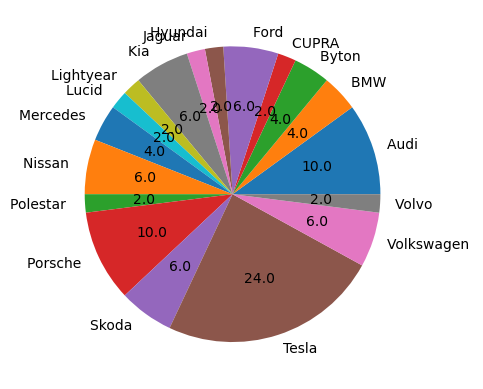

In [24]:
top_50_evs.groupby('Brand').size().plot(kind ='pie', autopct = '%.1f')

## Analysis :
Top 4 brands which comes under the high ranges:
    1.Tesla 
    2.Porsche & Audi
    3.Skoda, Volkswagen & Nissan 
    4.BWM, Mercedes ,Byton 